In [18]:
#loading library
library(sf)
library(dplyr)
library(tidyverse)
library("readxl")

In [20]:
data <- read_excel("../input/student-suicide-case-state-wise-in-year-2019-india/Educational_suicide.xls")

In [22]:
#loading datasets

data %>% drop_na()
#dropping Na (empty rows)
data <- x <- na.omit(data)
df <- data.frame(data)
any(is.na(df))

States/UTs,Year,CrimeHead,Male,Female,Transgender,Total
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Andhra Pradesh,2019,No Education,927,470,0,1397
Andhra Pradesh,2019,Primary (upto class-5),743,385,0,1128
Andhra Pradesh,2019,Middle (upto class-8),630,343,0,973
Andhra Pradesh,2019,Matriculate/Secondary (upto class-10),657,306,0,963
Andhra Pradesh,2019,Higher Secondary/ Intermediate/ Pre-University (upto class-12),395,150,0,545
Andhra Pradesh,2019,Diploma/ITI/Certificate,77,16,0,93
Andhra Pradesh,2019,Graduate and above,174,39,0,213
Andhra Pradesh,2019,Professionals (MBA; etc.),16,4,0,20
Andhra Pradesh,2019,Status not known,601,167,1,769


[1] FALSE

In [23]:
#printing total number of cases in 2019
print("the total number of sucide in srudenti in the yer is ")
sum(df$Total)

[1] "the total number of sucide in srudenti in the yer is "


[1] 131563

In [24]:
#printing the total number of male nd female
male_data = sum(df$Male, na.rm=TRUE)
female_data = sum(df$Female, na.rm=TRUE)
male_data
female_data

[1] 89062

[1] 42485

In [25]:
#loading ggplot

library(ggplot2)

In [26]:
#assiging the value of column name
Student.age <- df$CrimeHead
Total <- df$Total
State <- df$States.UTs

region <- df$States.UTs

In [27]:
state_table <- table(State)
state_table

State
Andaman and Nicobar      Andhra Pradesh   Arunachal Pradesh               Assam 
                  9                   9                   9                   9 
              Bihar          Chandigarh        Chhattisgarh               Delhi 
                  9                   9                   9                   9 
                Goa             Gujarat             Haryana    Himachal Pradesh 
                  9                   9                   9                   9 
  Jammu and Kashmir           Jharkhand           Karnataka              Kerala 
                  9                   9                   9                   9 
        Lakshadweep      Madhya Pradesh         Maharashtra             Manipur 
                  9                   9                   9                   9 
          Meghalaya             Mizoram            Nagaland              Odisha 
                  9                   9                   9                   9 
         Puducherry   

In [28]:
#ploting the statewise graph
state_graph <- ggplot() + geom_bar(aes(x = reorder(State, Total), y = Total, fill="#002233"), stat = "identity") +
  ggtitle("India Student sucide in 2019") + theme_classic() +
  theme(plot.title = element_text(hjust = 1)) + theme(axis.text = element_text(size = 10),
                                                      axis.title = element_text(size = 10)) + 
  theme(axis.text.x = element_text(angle = 90, hjust= 1)) + coord_flip() 

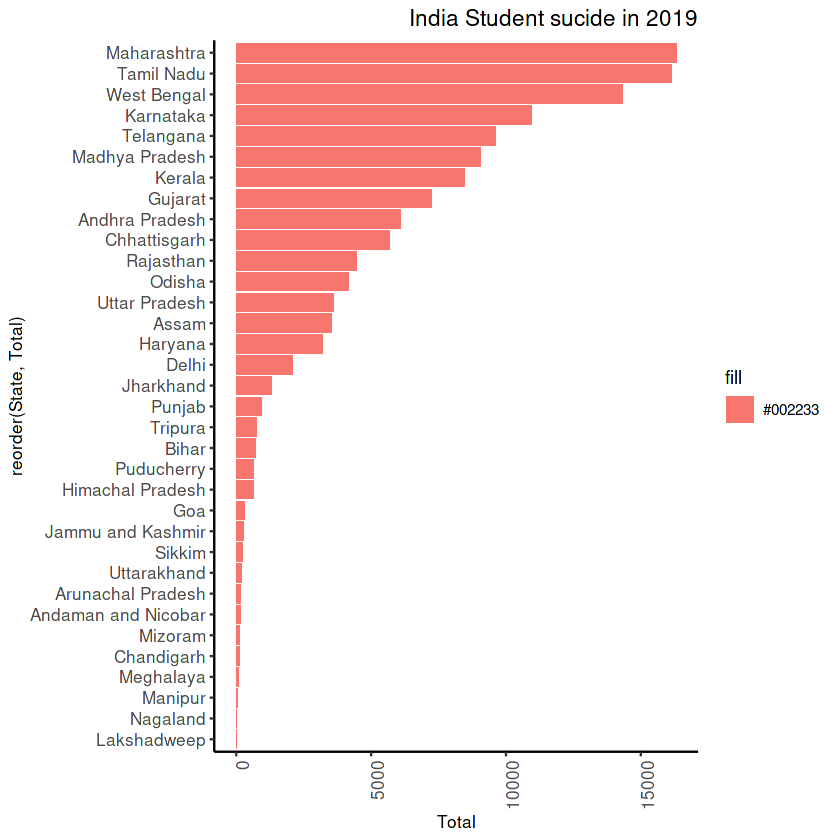

In [29]:
#printing state graph
print(state_graph)

In [30]:
#Merging and rearrainging  the data
pie_data <- df %>%                                        # Specify data frame
  group_by(df$CrimeHead) %>%                         # Specify group indicator
  summarise_at(vars(Total),              # Specify column
               list(name = sum)) %>%
  mutate(Percentage =round(name/sum(name)* 100, 2))

In [31]:

#plotting the graph pie chart 
Student  <- pie_data$`df$CrimeHead` 

In [32]:
pie_graph <- ggplot(pie_data) + theme_bw() + geom_bar(aes(x = "", y= Percentage, fill=Student), stat = "identity", color="white") +
  coord_polar("y",start=0) + ggtitle("Student Sucide") +theme(plot.title = element_text(hjust = 0.5, size = 20),
                                                              axis.title = element_blank(),
                                                              axis.text = element_blank(),
                                                              axis.ticks = element_blank(),
                                                              panel.grid = element_blank(),
                                                              panel.border = element_blank()) + 
  geom_text(aes(x="",y=Percentage,label=Percentage), position = position_stack(vjust=1)) +
  labs(x = NULL, y = NULL, fill = NULL)
#printing pie graph

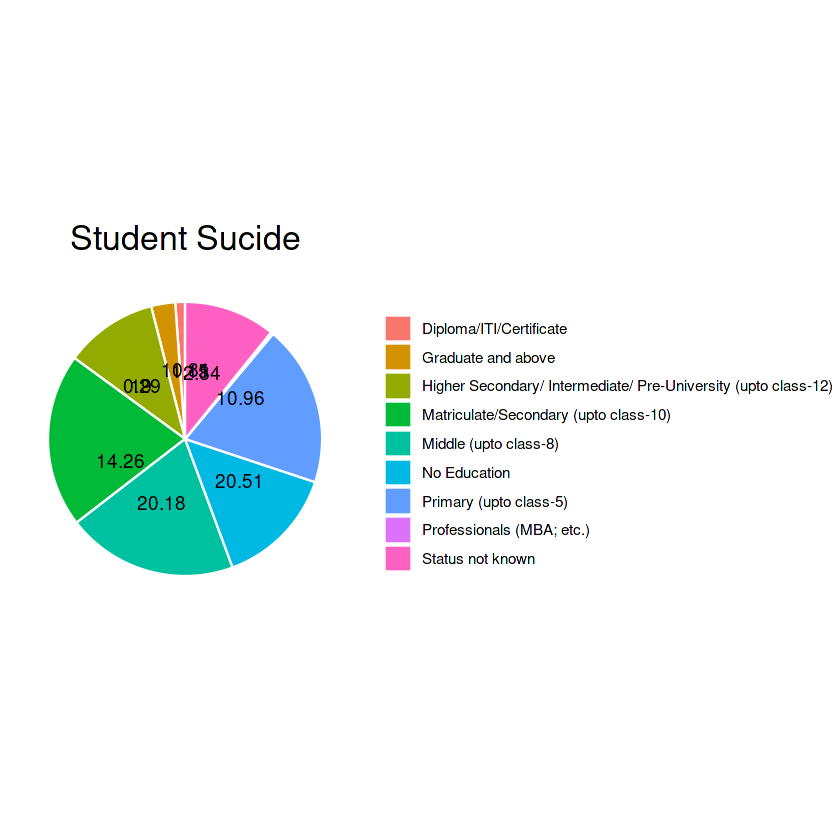

In [33]:
#printing pie graph
print(pie_graph)


In [42]:
#creating map

#merging and arranging dat for drawing map
map_data1 <- df %>%                                        # Specify data frame
  group_by(df$States.UTs) %>%                         # Specify group indicator
  summarise_at(vars(Total),              # Specify column
               list(Total = sum)) %>%
  mutate(Percentage =round(Total/sum(Total)* 100, 2))
map_data1

df$States.UTs,Total,Percentage
<chr>,<dbl>,<dbl>
Andaman and Nicobar,155,0.12
Andhra Pradesh,6101,4.64
Arunachal Pradesh,156,0.12
Assam,3546,2.70
Bihar,719,0.55
Chandigarh,105,0.08
Chhattisgarh,5683,4.32
Delhi,2095,1.59
Goa,291,0.22


In [ ]:
map_data1$df$States.UTs <- 

In [35]:
library(sf)

In [37]:
india_boundry <- st_read("../input/india-shape-file/India Shape/india_ds.shp")

Reading layer `india_ds' from data source 
  `/kaggle/input/india-shape-file/India Shape/india_ds.shp' using driver `ESRI Shapefile'
Simple feature collection with 482 features and 3 fields
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: 68.35859 ymin: 6.733651 xmax: 97.46212 ymax: 37.03473
CRS:           NA


In [43]:
#testing map data
plot(st_geometry(merge_data))

ERROR: Error in plot_sf(x, ...): NA value(s) in bounding box. Trying to plot empty geometries?


In [39]:
colnames(map_data1) <- c('STATE','Total','Percentage')
merge_data <- merge(india_boundry, map_data1, by="STATE")

In [40]:
#drawing map using ggplot()
map_graph <- ggplot(data=merge_data) + geom_sf(aes(fill=Total), color="white") +
  scale_fill_viridis_c(option="viridis", trans="sqrt") + 
  xlab("Longitude") + ylab("Latitude") + ggtitle("Suicide case in India State Wise Year 2019") 

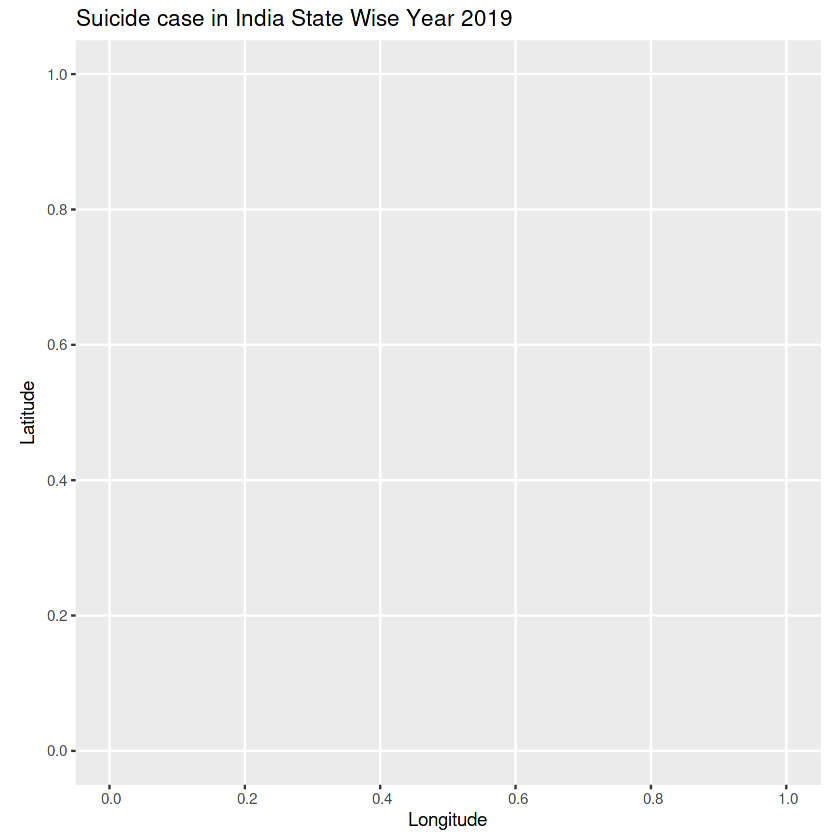

In [41]:
#printing map graph
print(map_graph)